In [1]:
## Etape 0 : Importation des librairies
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import cv2
import json

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

import keras

2022-12-05 15:35:05.899856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 15:35:06.073815: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-05 15:35:06.073842: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-05 15:35:06.974923: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
## Etape 1 : Chargement des données
print("Chargement des données...")

def load_image(path: str):
    img = mpimg.imread(path)
    # resize image
    img = cv2.resize(img, (375, 500))
    return img


def loading_images(path: str):
    train_images = []
    train_labels = []
    test_images = []
    test_labels = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".jpg"):
                if "Train" in root:
                    train_images.append(load_image(root + '/' + file))
                    train_labels.append(root.split("/")[-1])
                else:
                    test_images.append(load_image(root + '/' + file))
                    test_labels.append(root.split("/")[-1])
    return train_images, train_labels, test_images, test_labels

train_images, train_labels, test_images, test_labels = loading_images("dataset")

print("Chargement des données terminé")

Chargement des données...
Chargement des données terminé


Affichage des données...


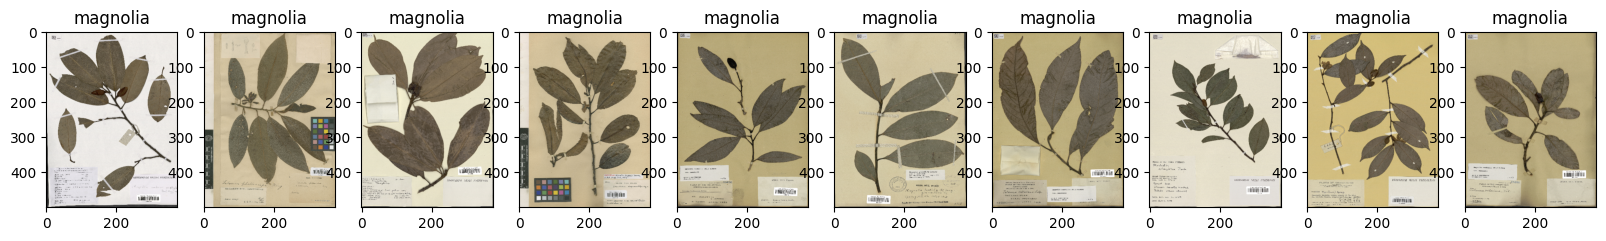

Affichage des données terminé


In [3]:
## Etape 2 : Affichage des données
print("Affichage des données...")

def show_images(images: list, labels: list, n: int):
    fig = plt.figure(figsize=(20, 20))
    for i in range(n):
        img = images[i]
        fig.add_subplot(1, n, i+1)
        plt.title(labels[i])
        plt.imshow(img.astype(np.uint8))
    plt.show()

show_images(train_images, train_labels, 10)

print("Affichage des données terminé")

Data augmentation...


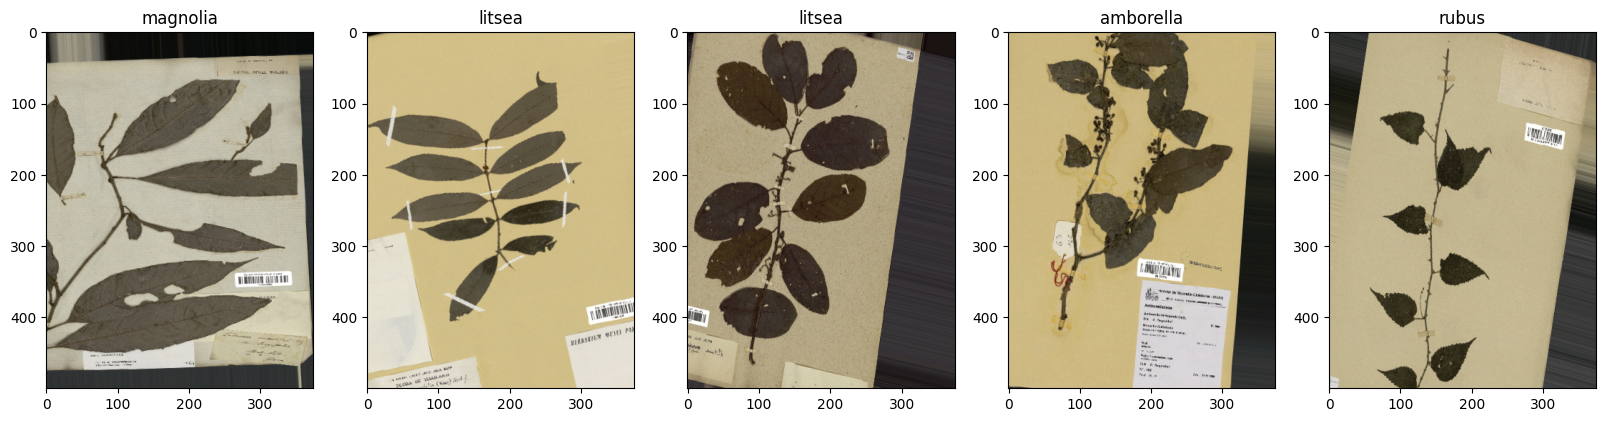

Data augmentation terminée


In [4]:
## Etape 3 : Data augmentation

print("Data augmentation...")

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest')


aug_train_images_generator = datagen.flow(np.array(train_images), np.array(train_labels))
aug_img, aug_lbl = aug_train_images_generator.next()
show_images(aug_img, aug_lbl, 5)

print("Data augmentation terminée")

In [6]:
## Etape 4 : Création du Dataset Avec augmentation

print("Dataset Augmentation ...")

def ajoute_n_batch_images(train_images, train_labels, generator, n):
    for count in range(n):
        print(f'{count}/{n}')
        aug_img, aug_lbl = generator.next()
        train_images = np.concatenate((train_images, aug_img))
        train_labels = np.concatenate((train_labels, aug_lbl))
    return train_images, train_labels

train_images, train_labels = ajoute_n_batch_images(train_images, train_labels, aug_train_images_generator, 5)

print("Dataset Augmentation terminée")



Dataset Augmentation ...
0/5
1/5
2/5
3/5
4/5
Dataset Augmentation terminée


In [7]:
print(train_images.__len__())

380


In [8]:
## Etape 5 : Generation D'un modèle Keras - Tensorflow

# model = Sequential()
# model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(250, 160, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(.2))
# model.add(Conv2D(64, kernel_size=3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(.2))
# model.add(Conv2D(128, kernel_size=3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(.2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='softmax'))

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(500, 375, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=.001), loss='mean_squared_error', metrics=['accuracy'])

model.summary()

2022-12-05 15:36:38.828693: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-05 15:36:38.828866: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/utility/Herbiera/venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-05 15:36:38.828913: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/utility/Herbiera/venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-05 15:36:38.828954: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 373, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 186, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 184, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 92, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 90, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 45, 128)      0

In [9]:
## Etape 6 : Entrainement du modèle

print("Entrainement du modèle...")

## Load json config
with open('config.json') as json_file:
    config = json.load(json_file)

train_labels = np.array([np.array(config[label]['matrice'][0]) for label in train_labels])
test_labels = np.array([np.array(config[label]['matrice'][0]) for label in test_labels])

model.fit(train_images, train_labels, epochs=50)
print("Entrainement du modèle terminé")

## Etape 7 : Evaluation du modèle
print("Evaluation du modèle...")
model.evaluate(test_images, test_labels)
print("Evaluation du modèle terminé")

Entrainement du modèle...


2022-12-05 15:36:41.060156: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 855000000 exceeds 10% of free system memory.


Epoch 1/10


2022-12-05 15:36:42.506967: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 760848384 exceeds 10% of free system memory.
2022-12-05 15:37:12.618384: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 372310016 exceeds 10% of free system memory.
2022-12-05 15:37:16.232445: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 372310016 exceeds 10% of free system memory.
2022-12-05 15:37:17.679073: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 379404288 exceeds 10% of free system memory.


12/12 [==============================] - 154s 5s/step - loss: 0.7184 - accuracy: 0.2816
Epoch 2/10
12/12 [==============================] - 53s 4s/step - loss: 0.7184 - accuracy: 0.2816
Epoch 3/10
12/12 [==============================] - 53s 4s/step - loss: 0.7184 - accuracy: 0.2816
Epoch 4/10
12/12 [==============================] - 197s 17s/step - loss: 0.7184 - accuracy: 0.2816
Epoch 5/10
12/12 [==============================] - 56s 5s/step - loss: 0.7184 - accuracy: 0.2816
Epoch 6/10
12/12 [==============================] - 69s 6s/step - loss: 0.7184 - accuracy: 0.2816
Epoch 7/10
12/12 [==============================] - 257s 23s/step - loss: 0.7184 - accuracy: 0.2816
Epoch 8/10
12/12 [==============================] - 226s 20s/step - loss: 0.7184 - accuracy: 0.2816
Epoch 9/10
12/12 [==============================] - 71s 6s/step - loss: 0.7184 - accuracy: 0.2816
Epoch 10/10
12/12 [==============================] - 53s 4s/step - loss: 0.7184 - accuracy: 0.2816
Entrainement du modèle 

ValueError: Data cardinality is ambiguous:
  x sizes: 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500
  y sizes: 110
Make sure all arrays contain the same number of samples.

In [14]:
print(np.array(test_images).shape)
print(np.array(test_labels).shape)

(110, 500, 375, 3)
(110,)
